# Optimization Algorithms for Linear Regression
## Stochastic Gradient Descent

In [186]:
!pip install git+https://github.com/pantelis-classes/PRML.git#egg=prml

import seaborn as sns

# Apply the default theme
sns.set_theme()

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/pantelis-classes/PRML.git to /tmp/pip-install-_4j2cc84/prml_8930520c42b2464fbb2af104487ffaa4
  Running command git clone --filter=blob:none --quiet https://github.com/pantelis-classes/PRML.git /tmp/pip-install-_4j2cc84/prml_8930520c42b2464fbb2af104487ffaa4
  Resolved https://github.com/pantelis-classes/PRML.git to commit 6c7ef85da419a644a4a4feb7ab538d2f4f15d46b
  Preparing metadata (setup.py) ... done


In [187]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

np.random.seed(1234)

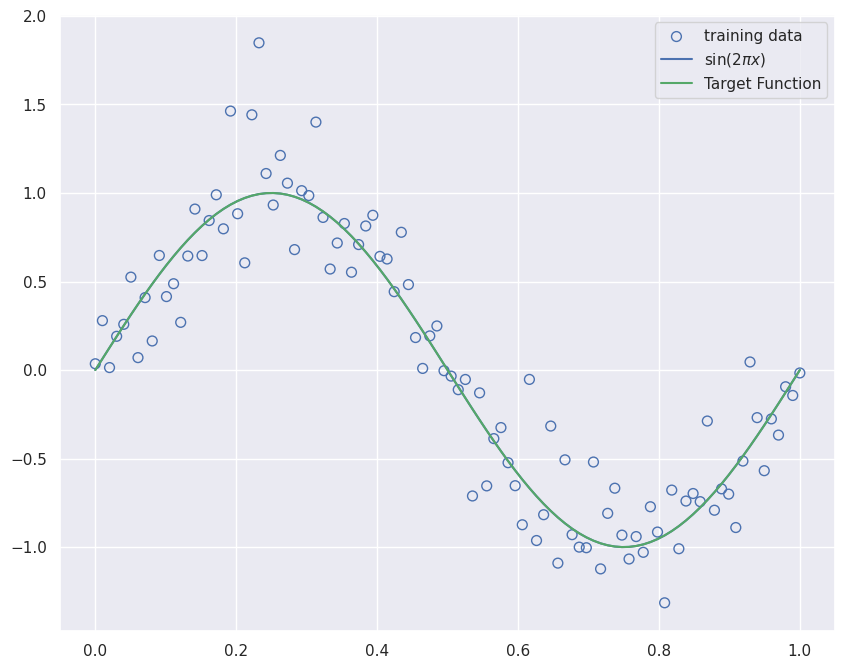

In [188]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 100, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

In [189]:
class SGD:
    def __init__(self, lr=0.001, epochs=200, batch_size=10, tol=1e-3):
        self.learning_rate = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.tolerance = tol
        self.w = None
        self.b = None
        self.x_epochs = []
        self.y_loss = []

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def gradient(self, X_batch, y_batch):
        y_pred = self.predict(X_batch)
        error = y_pred - y_batch
        gradient_weights = np.dot(X_batch.T, error) / X_batch.shape[0]
        gradient_bias = np.mean(error)
        return gradient_weights, gradient_bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.random.randn(n_features)
        self.b = np.random.randn()

        for epoch in range(self.epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                gradient_weights, gradient_bias = self.gradient(X_batch, y_batch)
                self.w -= self.learning_rate * gradient_weights
                self.b -= self.learning_rate * gradient_bias

            if epoch % 2 == 0:
                y_pred = self.predict(X)
                loss = self.mean_squared_error(y, y_pred)
                # print(f"Epoch {epoch}: Loss {loss}")
                self.x_epochs.append(epoch)
                self.y_loss.append(loss)

        return self.w, self.b

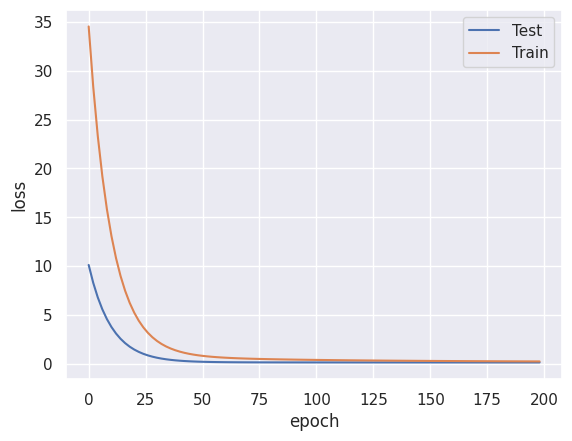

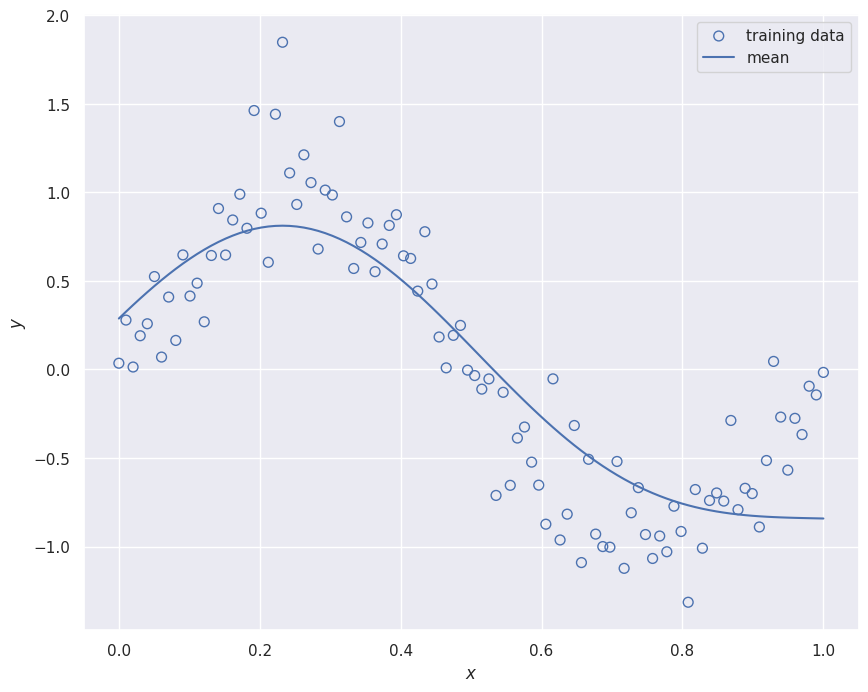

In [190]:
M = 9
# Pick one of the three features below
# feature = PolynomialFeature(M)
feature = GaussianFeature(np.linspace(0, 1, M), 0.1)
# feature = SigmoidalFeature(np.linspace(0, 1, M), 10)

X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
model = SGD()
model.fit(X_train, y_train)

model2 = SGD()
model2.fit(X_test, y_test)

plt.plot(model.x_epochs, model.y_loss, label="Test")
plt.plot(model2.x_epochs, model2.y_loss, label="Train")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")

y = model.predict(X_test)

plt.figure(figsize=[10, 8])

plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
plt.plot(x_test, y, label="mean")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

# Logistic Regression
## Data Preprocessing

In [1]:
# I was unable to read the data into a DataFrame, even after trying various adjustments to the chunksize parameter.
# The following code is commented as it crashes whatever machine it runs on (docker container, colab, etc.)

# import pandas as pd

# df = pd.read_csv('train.gz')
# df.head()